<center><img src="redpopcorn.jpg"></center>

# **Netflix**! 
What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. 

The analysis aimed to answer two key questions:

What is the most common duration of movies from the 1990s?
How many short action movies (with a runtime of less than 90 minutes) from the 1990s are in the dataset?

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Read in the Netflix CSV as a DataFrame, and use the describe method.
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812.000000,4812.000000,4812,4812
unique,4812,2,4812,3615,4690,72,1292,NaN,NaN,4807,31
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",NaN,NaN,A scheming matriarch plots to cut off her disa...,Dramas
freq,1,4677,1,18,10,1886,100,NaN,NaN,2,1343
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.711554,99.566708,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.517978,30.889305,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,88.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,99.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,116.000000,NaN,NaN


In [29]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


The Netflix dataset contains 4,812 entries, each with a unique show_id. It consists of 10 columns, with two of them (release_year and duration) being integers, and the remaining eight as objects. None of the columns contain null values. The dataset includes only two types of shows, and the range of release years spans from 1942 to 2021, with a standard deviation of 9.5 years. The duration of the shows ranges from 1 minute to 253 minutes, with an average of 253 minutes.

Additionally, when using the describe() method, the description column shows 4,807 unique descriptions across the 4,812 entries, indicating that there are 5 duplicated descriptions in the dataset. This can be verified with the duplicated method.

In [49]:
duplicated_descriptions = netflix_df.duplicated(subset=['description']).sum()
print(duplicated_descriptions)

5


Get the index of the rows with the duplicated descriptions:

In [71]:
duplicates = netflix_df.duplicated(subset=['description'], keep = False)
duplicates.index[duplicates == True].tolist()

[848, 849, 952, 953, 1786, 1868, 3564, 3565, 4037, 4436]

In [81]:
print(netflix_df[848:850])

    show_id   type            title      director  \
848   s1287  Movie  Chashme Baddoor  David Dhawan   
849   s1288  Movie  Chashme Buddoor  David Dhawan   

                                                  cast country    date_added  \
848  Rishi Kapoor, Ali Zafar, Taapsee Pannu, Siddha...   India  July 5, 2020   
849  Ali Zafar, Siddharth, Divyendu Sharma, Tapsee ...   India   May 1, 2017   

     release_year  duration  \
848          2013       121   
849          2013       121   

                                           description     genre  
848  When pretty new neighbor Seema falls for their...  Comedies  
849  When pretty new neighbor Seema falls for their...  Comedies  


In the case of rows 848 and 849, the name of the movie, release_year, duration, and director are the same. The cast is the same but the names are in different order, and the movie was added twice, in 2020 and 2017.

In [85]:
print(netflix_df[952:954])

    show_id   type          title      director  \
952   s1486  Movie   Consequences  Ozan Açıktan   
953   s1487  Movie  Consequences   Ozan Açıktan   

                                                  cast country  \
952  Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...  Turkey   
953  Nehir Erdoğan, Tardu Flordun, İlker Kaleli, Se...  Turkey   

           date_added  release_year  duration  \
952  October 25, 2019          2014       106   
953  October 25, 2019          2014       106   

                                           description   genre  
952  Secrets bubble to the surface after a sensual ...  Dramas  
953  Secrets bubble to the surface after a sensual ...  Dramas  


In [109]:
display(netflix_df.iloc[3564], netflix_df.iloc[3565])

show_id                                                     s5699
type                                                        Movie
title                                     Solo: A Star Wars Story
director                                               Ron Howard
cast            Alden Ehrenreich, Woody Harrelson, Emilia Clar...
country                                             United States
date_added                                        January 9, 2019
release_year                                                 2018
duration                                                      135
description     A young Han Solo tries to settle an old score ...
genre                                                      Action
Name: 3564, dtype: object

show_id                                                     s5700
type                                                        Movie
title                   Solo: A Star Wars Story (Spanish Version)
director                                               Ron Howard
cast            Alden Ehrenreich, Woody Harrelson, Emilia Clar...
country                                             United States
date_added                                        January 9, 2019
release_year                                                 2018
duration                                                      135
description     A young Han Solo tries to settle an old score ...
genre                                                      Action
Name: 3565, dtype: object

In [127]:
display(netflix_df.iloc[4037], netflix_df.iloc[1868])

show_id                                                     s6488
type                                                        Movie
title                                           The Incredibles 2
director                                                Brad Bird
cast            Craig T. Nelson, Holly Hunter, Samuel L. Jacks...
country                                             United States
date_added                                       January 30, 2019
release_year                                                 2018
duration                                                      118
description     When Elastigirl gets recruited for a high-prof...
genre                                                    Children
Name: 4037, dtype: object

show_id                                                     s2986
type                                                        Movie
title                             Incredibles 2 (Spanish Version)
director                                                Brad Bird
cast            Víctor Trujillo, Consuelo Duval, Darío T. Pie,...
country                                             United States
date_added                                       February 8, 2019
release_year                                                 2018
duration                                                      118
description     When Elastigirl gets recruited for a high-prof...
genre                                                    Children
Name: 1868, dtype: object

In [125]:
print(netflix_df.iloc[4436], netflix_df.iloc[1786])

show_id                                                     s7130
type                                                        Movie
title                                       Together For Eternity
director                                       Sooraj R. Barjatya
cast            Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...
country                                                     India
date_added                                       February 1, 2020
release_year                                                 1999
duration                                                      176
description     A scheming matriarch plots to cut off her disa...
genre                                                      Dramas
Name: 4436, dtype: object show_id                                                     s2861
type                                                        Movie
title                                        Hum Saath-Saath Hain
director                                       Soo

Looking at the data, we have 5 duplicated movies, although two of them (Solo: A Star Wars Story and Incredibles 2) are the Spanish and English versions of the movie. To answer the following questions: What is the most common duration of films from the 1990s?
How many short action movies (with a runtime of less than 90 minutes) from the 1990s are in the dataset?, the duplicates should be removed.

In [131]:
netflix_clean = netflix_df.drop_duplicates(subset=['description'])
netflix_clean.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
count,4807,4807,4807,4807,4807,4807,4807,4807.000000,4807.000000,4807,4807
unique,4807,2,4807,3615,4687,72,1292,NaN,NaN,4807,31
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",NaN,NaN,After a devastating earthquake hits Mexico Cit...,Dramas
freq,1,4672,1,18,10,1884,100,NaN,NaN,1,1341
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.711879,99.533805,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.520243,30.878618,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,88.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,99.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,116.000000,NaN,NaN


The data doesnt contain nulls or duplicates. 

In [133]:
netflix_clean.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
duration         int64
description     object
genre           object
dtype: object

Checking all values in release_year are actually integers:

In [139]:
(netflix_clean["release_year"] % 1  == 0).all()

True

Selecting the movies from 1990 to 2000

In [145]:
movies_netflix = netflix_clean[netflix_clean["type"] == "Movie"]
movies_90s = movies_netflix[movies_netflix["release_year"] > 1989]
movies_90s = movies_90s[movies_90s["release_year"] < 2000]

movies_90s.describe()

,release_year,duration
count,182.000000,182.000000
mean,1995.137363,114.785714
std,2.922163,32.982889
min,1990.000000,28.000000
25%,1993.000000,94.000000
50%,1996.000000,108.000000
75%,1998.000000,135.750000
max,1999.000000,195.000000


Selecting the duration of movies from the 90s and getting the most frequent duration with mode:

In [147]:
duration_movies_90s = movies_90s[["duration"]]
most_frequent_duration = duration_movies_90s.mode()
print(most_frequent_duration)
duration = 94

   duration
0        94


Visualizing the distribution of movie durations in the 90s

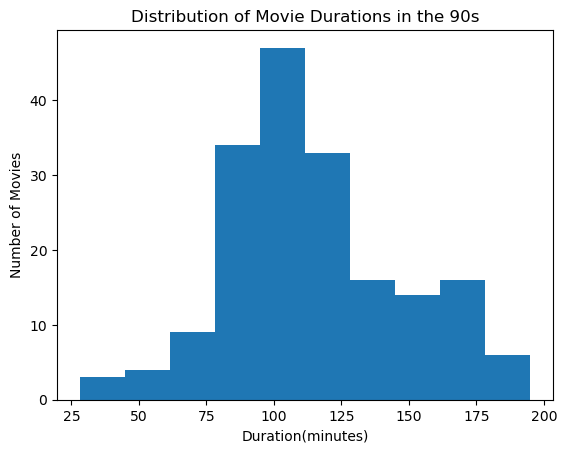

In [149]:
plt.hist(duration_movies_90s)
plt.title("Distribution of Movie Durations in the 90s")
plt.xlabel("Duration(minutes)")
plt.ylabel("Number of Movies")
plt.show()

Selecting action movies from the 90s with a duration less than 90 min

In [153]:
action_movies = movies_90s[movies_90s["genre"] == "Action"]
short_movie_count = (action_movies["duration"] < 90).sum()
print(short_movie_count)

7
